C:\Users\Egor\AppData\Local\Temp\ipykernel_10008\661464237.py:8: RuntimeWarning: overflow encountered in scalar multiply
  dydt = x*x - 1


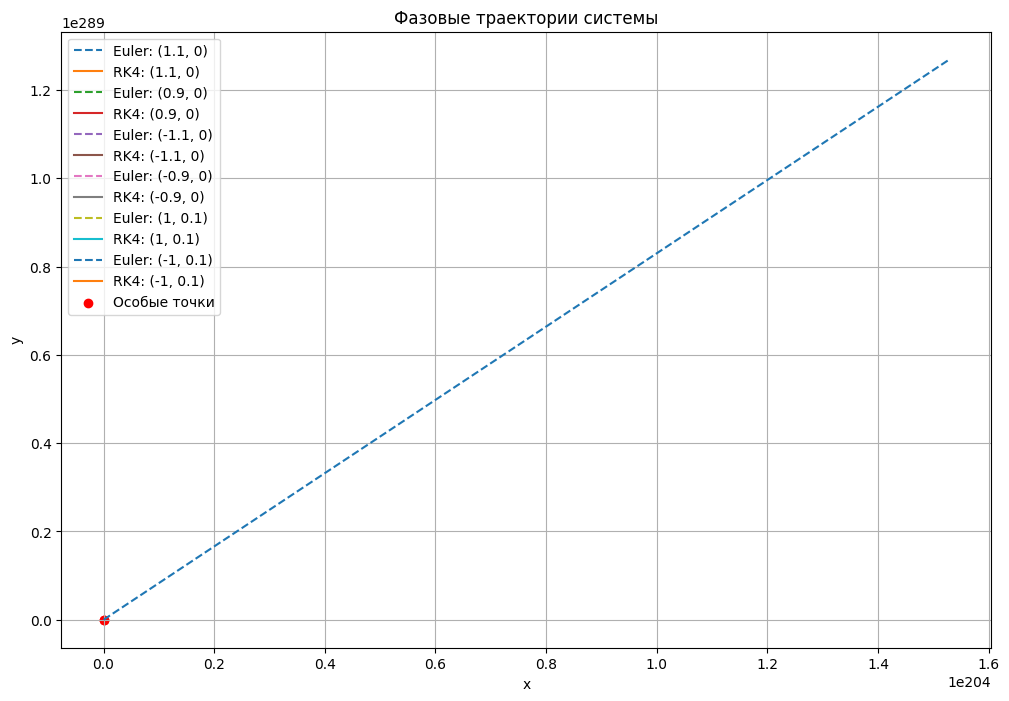

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def system(t, z):
    x, y = z
    dxdt = y
    dydt = x*x - 1
    return np.array([dxdt, dydt])

def euler_step(t, z, h, system):
    dzdt = system(t, z)
    return z + h * dzdt

def rk4_step(t, z, h, system):
    k1 = system(t, z)
    k2 = system(t + h/2, z + h/2 * k1)
    k3 = system(t + h/2, z + h/2 * k2)
    k4 = system(t + h, z + h * k3)
    return z + h/6 * (k1 + 2*k2 + 2*k3 + k4)

def solve_ode(z0, t_span, h, method):
    t = np.arange(t_span[0], t_span[1] + h, h)
    z = np.zeros((len(t), 2))
    z[0] = z0
    for i in range(1, len(t)):
        z[i] = method(t[i-1], z[i-1], h, system)
    return t, z

# Параметры
h_euler = 0.01  # Шаг для метода Эйлера (может быть неустойчивым при больших h)
h_rk4 = 0.1      # Шаг для RK4 (более устойчив)
t_span = (0, 10)

# Начальные условия вблизи особых точек
initial_conditions = [
    (1.1, 0),    # Близко к (1, 0)
    (0.9, 0),    # Близко к (1, 0) с другой стороны
    (-1.1, 0),   # Близко к (-1, 0)
    (-0.9, 0),   # Близко к (-1, 0) с другой стороны
    (1, 0.1),    # Сдвиг по y
    (-1, 0.1)    # Сдвиг по y
]

# Решение и построение
plt.figure(figsize=(12, 8))

for x0, y0 in initial_conditions:
    # Метод Эйлера
    t_euler, z_euler = solve_ode([x0, y0], t_span, h_euler, euler_step)
    plt.plot(z_euler[:, 0], z_euler[:, 1], '--', label=f'Euler: ({x0}, {y0})')

    # Метод RK4
    t_rk4, z_rk4 = solve_ode([x0, y0], t_span, h_rk4, rk4_step)
    plt.plot(z_rk4[:, 0], z_rk4[:, 1], '-', label=f'RK4: ({x0}, {y0})')

# Отметим особые точки
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Фазовые траектории системы')
plt.legend()
plt.grid()
plt.show()